In [2]:
import json
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# Load Final df

In [136]:
final_df = pd.read_csv('../ready_dataframes/final_df.csv')

In [86]:
# final_df['Name'] = final_df['FirstName'] + ' ' + final_df['LastName']

In [140]:
final_df.set_index(['Name', 'FlightNumber', 'Date']).sort_index()

AirlineName ArrivalAirport  \
Name          FlightNumber Date                                                 
adel afanasev CZ3383       2017-03-11  china southern airlines            NNY   
              CZ6478       2017-07-21  china southern airlines            CGO   
              SU1457       2017-01-21                 aeroflot            SVO   
adel ageev    AF1343       2017-03-17               air france            CDG   
              AM451        2017-10-18               aeromexico            HAV   
...                                                        ...            ...   
zlata zykova  MU5667       2017-06-12   china eastern airlines            DLC   
              MU583        2017-06-30   china eastern airlines            LAX   
              MU6118       2017-05-06   china eastern airlines            NGB   
              MU6123       2017-04-19   china eastern airlines            HYN   
              SU1451       2017-01-22                 aeroflot            SVO   

                                            ArrivalCity ArrivalCountry  \
Name          FlightNumber Date                                          
adel afanasev CZ3383       2017-03-11           nanyang          china   
              CZ6478       2017-07-21         zhengzhou          china   
              SU1457       2017-01-21        zelenograd         russia   
adel ageev    AF1343       2017-03-17  le mesnil-amelot         france   
              AM451        2017-10-18             wajay           cuba   
...                                                 ...            ...   
zlata zykova  MU5667       2017-06-12            dalian          china   
              MU583        2017-06-30    los angeles ca  united states   
              MU6118       2017-05-06            ningbo          china   
              MU6123       2017-04-19          huangyan          china   
              SU1451       2017-01-22        zelenograd         russia   

                                        BirthDate       BonusProgramm  \
Name          FlightNumber Date                                         
adel afanasev CZ3383       2017-03-11         NaN                 NaN   
              CZ6478       2017-07-21  1976-01-16                 NaN   
              SU1457       2017-01-21  1976-01-16                 NaN   
adel ageev    AF1343       2017-03-17  1972-05-23      Aeroflot Bonus   
              AM451        2017-10-18  1972-05-23  Korean Air SKYPASS   
...                                           ...                 ...   
zlata zykova  MU5667       2017-06-12         NaN                 NaN   
              MU583        2017-06-30         NaN                 NaN   
              MU6118       2017-05-06         NaN                 NaN   
              MU6123       2017-04-19         NaN         Flying Blue   
              SU1451       2017-01-22         NaN                 NaN   

                                      BonusProgrammNumber DepartureAirport  \
Name          FlightNumber Date                                              
adel afanasev CZ3383       2017-03-11                 NaN              CAN   
              CZ6478       2017-07-21                 NaN              SZX   
              SU1457       2017-01-21                 NaN              KEJ   
adel ageev    AF1343       2017-03-17        SU 930869690              GVA   
              AM451        2017-10-18        KE 989004326              MEX   
...                                                   ...              ...   
zlata zykova  MU5667       2017-06-12                 NaN              PVG   
              MU583        2017-06-30                 NaN              PVG   
              MU6118       2017-05-06                 NaN              HYN   
              MU6123       2017-04-19        FB 655400320              SHA   
              SU1451       2017-01-22                 NaN              KEJ   

                                      DepartureCity DepartureCountry 

# Create new df for passengers

In [141]:
names_list = sorted(set(final_df['Name']))

In [142]:
passengers = pd.DataFrame({'Name': names_list})
passengers

,Name
0,adel afanasev
1,adel ageev
2,adel akimov
3,adel aksenov
4,adel aleksandrov
...,...
74472,zlata zotova
74473,zlata zubova
74474,zlata zvereva
74475,zlata zvyagintseva


# Add features

## Age

In [100]:
name_age = final_df.groupby('Name')['Age'].max()

KeyError: 'Column not found: Age'

In [51]:
passengers['Age'] = passengers['Name'].map(lambda name: name_age[name])

## Registered
Was passenger registered on the frequent fliers forum

In [143]:
name_registered = final_df.groupby('Name')['Registered'].max()

In [144]:
passengers['Registered'] = passengers['Name'].map(lambda name: name_registered[name])

## Number of total flights

In [145]:
name_total_flights = final_df.groupby('Name')['FlightNumber'].count()

In [146]:
passengers['TotalFlights'] = passengers['Name'].map(lambda name: name_total_flights[name])

## Number of unique countries & cities visited
Correlated features, must to delete `'CitiesVisited'`

In [147]:
name_unique_countries = final_df.groupby('Name')['DepartureCountry'].agg(lambda x: len(set(x)))

In [148]:
name_unique_cities = final_df.groupby('Name')['DepartureCity'].agg(lambda x: len(set(x)))

In [149]:
passengers['CountriesVisited'] = passengers['Name'].map(lambda name: name_unique_countries[name])

In [188]:
passengers['CitiesVisited'] = passengers['Name'].map(lambda name: name_unique_cities[name])

## Used bonus programmes

### Number of used bonus programmes

In [151]:
name_number_programmes = final_df.groupby('Name')['BonusProgrammNumber'].agg(lambda x: len(set([num for num in x if num is not np.nan])))

In [152]:
passengers['TotalBonusPrograms'] = passengers['Name'].map(lambda name: name_number_programmes[name])

### Composition of bonus programmes

In [153]:
name_programmes = final_df.groupby('Name')['BonusProgrammNumber'].agg(lambda x: set([num[:2] for num in x if num is not np.nan]))

In [154]:
passengers['UseSU'] = passengers['Name'].map(lambda name: int('SU' in name_programmes[name]))
passengers['UseDT'] = passengers['Name'].map(lambda name: int('DT' in name_programmes[name]))
passengers['UseKE'] = passengers['Name'].map(lambda name: int('KE' in name_programmes[name]))
passengers['UseFB'] = passengers['Name'].map(lambda name: int('FB' in name_programmes[name]))

## Gender

In [155]:
name_gender = final_df.groupby('Name')['Gender'].max()

In [156]:
passengers['Gender'] = passengers['Name'].map(lambda name: name_gender[name])

In [157]:
passengers['Gender'] = passengers['Gender'].map(lambda x: 1 if x == 'M' else 0)

## Offshores visited

In [158]:
offshores = set([
    'united arab emirates',
    'belize',
    'virgin isla',
    'seychelles',
    'cayman islands',
    'panama',
    'bahamas',
])

In [159]:
name_offshores = final_df.groupby('Name')['ArrivalCountry'].agg(lambda x: len([country for country in x if country in offshores]))

In [160]:
passengers['OffshoresVisited'] = passengers['Name'].map(lambda name: name_offshores[name])

In [161]:
passengers['OffshoresVisitedRate'] = passengers['OffshoresVisited'] / passengers['CountriesVisited']

## Mean of deltas between flights

In [162]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [163]:
def calculate_deltas_mean(times):
    if len(times) <= 1:
        return 0.0
    deltas = []
    times.sort()
    for i in range(1, len(times)):
        deltas.append((times[i] - times[i - 1]).days)
    return np.mean(deltas)

In [164]:
name_deltas_mean = final_df.groupby('Name')['Date'].agg(lambda x: calculate_deltas_mean([date for date in x]))

In [165]:
passengers['MeanDelta'] = passengers['Name'].map(lambda name: name_deltas_mean[name])

## Percent of flights to 3 most popular countries
Russia, United States and China

In [166]:
name_percent_to_russia = final_df.groupby('Name')['ArrivalCountry'].agg(lambda x: list(x).count('russia') / len(list(x)))

In [167]:
passengers['PercentToRussia'] = passengers['Name'].map(lambda name: name_percent_to_russia[name])

In [168]:
name_percent_to_usa = final_df.groupby('Name')['ArrivalCountry'].agg(lambda x: list(x).count('united states') / len(list(x)))

In [169]:
passengers['PercentToUSA'] = passengers['Name'].map(lambda name: name_percent_to_usa[name])

In [170]:
name_percent_to_china = final_df.groupby('Name')['ArrivalCountry'].agg(lambda x: list(x).count('china') / len(list(x)))

In [171]:
passengers['PercentToChina'] = passengers['Name'].map(lambda name: name_percent_to_china[name])

## Number of used airlines companies
Correlated with `TotalFlightNumber`

In [172]:
name_airlines = final_df.groupby('Name')['AirlineName'].agg(lambda x: len(set([name for name in x if name is not np.nan])))

In [173]:
passengers['NumberAirlines'] = passengers['Name'].map(lambda name: name_airlines[name])

In [174]:
passengers['NumberAirlinesPerFlight'] = passengers['NumberAirlines'] / passengers['TotalFlights']

## Does person hide his real name on forum

In [175]:
json_name_bonus = pd.read_csv('../utility_dataframes/json_name_bonus.csv', index_col=0)

In [176]:
bonus_without_real_name = set(json_name_bonus.loc[json_name_bonus['Name'].isna(), 'BonusProgrammNumber'])

In [177]:
name_hide_name = final_df.groupby('Name')['BonusProgrammNumber'].agg(lambda x: int(len(set([bonus for bonus in x if bonus is not np.nan]) & bonus_without_real_name) > 0))

In [178]:
passengers['HideRealName'] = passengers['Name'].map(lambda name: name_hide_name[name])

## Unique Countries Per Flight

In [179]:
passengers['UniqueCountriesPerFlight'] = passengers['CountriesVisited'] / passengers['TotalFlights']

## Flights from Russia abroad

In [180]:
name_dep_arr_countries = final_df[['Name', 'DepartureCountry', 'ArrivalCountry']].groupby('Name').agg(lambda x: set(np.where(np.array(x) == 'russia')[0]))

In [181]:
name_dep_arr_countries['NumberFlightsAbroad'] = (name_dep_arr_countries['DepartureCountry'] - name_dep_arr_countries['ArrivalCountry']).map(lambda x: len(x))

In [182]:
passengers['NumberFlightsAbroad'] = passengers['Name'].map(lambda name: name_dep_arr_countries.loc[name, 'NumberFlightsAbroad'])

In [183]:
passengers['PercentFlightsAbroad'] = passengers['NumberFlightsAbroad'] / passengers['TotalFlights']

# Features correlation

In [184]:
passengers.drop(['CitiesVisited'], axis=1, inplace=True)

In [185]:
passengers.corr()

,Registered,TotalFlights,CountriesVisited,TotalBonusPrograms,UseSU,UseDT,UseKE,UseFB,Gender,OffshoresVisited,...,MeanDelta,PercentToRussia,PercentToUSA,PercentToChina,NumberAirlines,NumberAirlinesPerFlight,HideRealName,UniqueCountriesPerFlight,NumberFlightsAbroad,PercentFlightsAbroad
Registered,1.000000,0.333489,0.302714,0.417871,0.639169,0.082271,0.202889,0.087177,-0.026748,0.061576,...,-0.169010,-0.138451,0.027249,0.049970,0.286494,-0.216958,0.546548,-0.184620,0.276476,0.071599
TotalFlights,0.333489,1.000000,0.849406,0.529262,0.319173,0.263971,0.285060,0.266554,-0.086317,0.194763,...,-0.432369,-0.417454,0.147152,0.117786,0.805422,-0.579263,0.093648,-0.508830,0.773269,0.152772
CountriesVisited,0.302714,0.849406,1.000000,0.459505,0.288189,0.231229,0.254819,0.235920,-0.082023,0.254476,...,-0.368901,-0.502804,0.010624,0.057072,0.900988,-0.403403,0.076293,-0.217485,0.708700,0.197463
TotalBonusPrograms,0.417871,0.529262,0.459505,1.000000,0.579273,0.584732,0.583307,0.583486,-0.053538,0.104203,...,-0.247713,-0.185241,0.061097,0.050013,0.458177,-0.335283,0.295106,-0.304459,0.423506,0.090602
UseSU,0.639169,0.319173,0.288189,0.579273,1.000000,0.160757,0.163077,0.162635,-0.037791,0.058989,...,-0.170351,-0.145021,0.043435,0.035400,0.280895,-0.236100,0.384309,-0.206299,0.262196,0.073616
UseDT,0.082271,0.263971,0.231229,0.584732,0.160757,1.000000,0.178780,0.191887,-0.031454,0.053031,...,-0.138615,-0.099951,0.033372,0.026556,0.235554,-0.196242,0.084247,-0.180967,0.211888,0.051476
UseKE,0.202889,0.285060,0.254819,0.583307,0.163077,0.178780,1.000000,0.174873,-0.042746,0.056125,...,-0.144240,-0.125209,0.038240,0.041725,0.262398,-0.203537,0.142853,-0.186761,0.224996,0.056252
UseFB,0.087177,0.266554,0.235920,0.583486,0.162635,0.191887,0.174873,1.000000,-0.033362,0.054363,...,-0.138635,-0.105504,0.037132,0.026531,0.240134,-0.197514,0.086815,-0.180075,0.213335,0.055324
Gender,-0.026748,-0.086317,-0.082023,-0.053538,-0.037791,-0.031454,-0.042746,-0.033362,1.000000,-0.018553,...,0.035240,0.082247,-0.037779,-0.014750,-0.082983,0.082705,-0.017660,0.071688,-0.069024,-0.031558
OffshoresVisited,0.061576,0.194763,0.254476,0.104203,0.058989,0.053031,0.056125,0.054363,-0.018553,1.000000,...,-0.086506,-0.117526,-0.038320,0.001997,0.222977,-0.079487,0.006790,-0.030654,0.153847,0.038977


In [190]:
passengers

,Name,Registered,TotalFlights,CountriesVisited,TotalBonusPrograms,UseSU,UseDT,UseKE,UseFB,Gender,...,PercentToRussia,PercentToUSA,PercentToChina,NumberAirlines,NumberAirlinesPerFlight,HideRealName,UniqueCountriesPerFlight,NumberFlightsAbroad,PercentFlightsAbroad,CitiesVisited
0,adel afanasev,0,3,2,0,0,0,0,0,1,...,0.333333,0.000000,0.666667,2,0.666667,0,0.666667,0,0.000000,3
1,adel ageev,1,47,13,5,1,1,1,1,1,...,0.085106,0.510638,0.063830,7,0.148936,0,0.276596,2,0.042553,37
2,adel akimov,1,39,7,4,1,1,1,1,1,...,0.153846,0.230769,0.333333,8,0.205128,1,0.179487,3,0.076923,29
3,adel aksenov,0,17,5,2,0,1,1,0,1,...,0.411765,0.000000,0.000000,3,0.176471,0,0.294118,3,0.176471,14
4,adel aleksandrov,0,21,10,0,0,0,0,0,1,...,0.285714,0.000000,0.000000,5,0.238095,0,0.476190,2,0.095238,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74472,zlata zotova,0,66,13,3,0,1,1,1,0,...,0.045455,0.712121,0.015152,10,0.151515,0,0.196970,3,0.045455,48
74473,zlata zubova,0,43,17,2,0,1,1,0,0,...,0.209302,0.069767,0.069767,12,0.279070,0,0.395349,5,0.116279,33
74474,zlata zvereva,1,14,4,3,1,1,0,1,0,...,0.071429,0.642857,0.000000,3,0.214286,1,0.285714,1,0.071429,12
74475,zlata zvyagintseva,1,24,3,1,1,0,0,0,0,...,0.291667,0.000000,0.666667,4,0.166667,0,0.125000,1,0.041667,18


<AxesSubplot:>

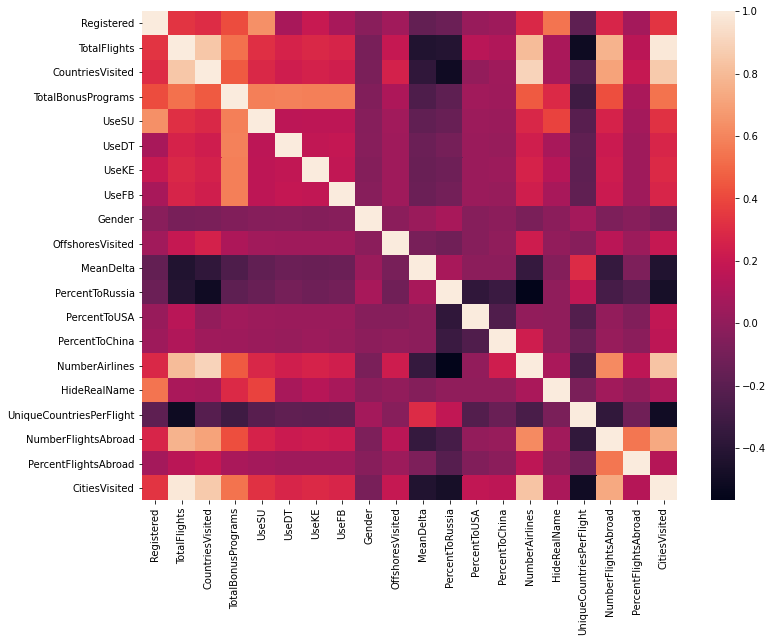

In [189]:
corrmat = passengers.drop(['OffshoresVisitedRate', 'NumberAirlinesPerFlight'], axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

<AxesSubplot:>

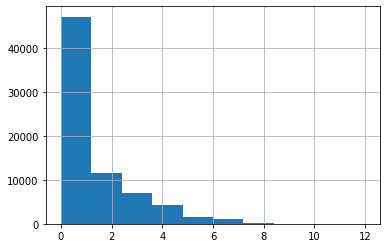

In [37]:
passengers['TotalBonusPrograms'].hist()

In [68]:
passengers.columns

Index(['Name', 'Age', 'Registered', 'TotalFlights', 'CountriesVisited',
       'TotalBonusPrograms', 'UseSU', 'UseDT', 'UseKE', 'UseFB', 'Gender',
       'OffshoresVisited', 'MeanDelta', 'PercentToRussia', 'PercentToUSA',
       'PercentToChina', 'NumberAirlines', 'HideRealName',
       'UniqueCountriesPerFlight', 'NumberFlightsAbroad',
       'PercentFlightsAbroad', 'CountriesVisitedPerFlight',
       'OffshoresVisitedRate', 'NumberAirlinesPerFlight'],
      dtype='object')

In [187]:
passengers.to_csv('../ready_dataframes/passengers.csv')